# Machine Learning Assignment


## Loading the dataset

In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

dataSet = pd.read_csv('data/airline-satisfaction.csv')
pd.set_option('display.max_columns', None)
print(dataSet.info())
dataSet.head(50)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   ID                                 129880 non-null  int64  
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     100154 non-null  object 
 5   Class                              84727 non-null   object 
 6   Flight Distance                    129880 non-null  int64  
 7   Inflight wifi service              86909 non-null   float64
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Ease of Online booking             129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Food and drink                     1298

,ID,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3.0,4,3,1,5,NaN,5,NaN,4,3,4,4,5,5,25.0,18.0,neutral
1,5047,Male,disloyal Customer,25,NaN,Business,235,3.0,2,3,3,1,NaN,1,NaN,1,5,3,1,4,1,1.0,NaN,neutral
2,110028,Female,Loyal Customer,26,NaN,Business,1142,2.0,2,2,2,5,NaN,5,NaN,4,3,4,4,4,5,0.0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,NaN,562,2.0,5,5,5,2,NaN,2,2.0,2,5,3,1,4,2,11.0,9.0,neutral
4,119299,Male,Loyal Customer,61,NaN,NaN,214,3.0,3,3,3,4,NaN,5,3.0,3,4,4,3,3,3,0.0,NaN,satisfied
5,111157,Female,Loyal Customer,26,NaN,Eco,1180,3.0,4,2,1,1,2.0,1,1.0,3,4,4,4,4,1,0.0,NaN,neutral
6,82113,Male,Loyal Customer,47,Personal Travel,Eco,1276,NaN,4,2,3,2,NaN,2,2.0,3,3,4,3,5,2,NaN,NaN,neutral
7,96462,Female,Loyal Customer,52,NaN,Business,2035,NaN,3,4,4,5,NaN,5,5.0,5,5,5,4,5,4,4.0,NaN,satisfied
8,79485,Female,Loyal Customer,41,Business travel,Business,853,1.0,2,2,2,4,NaN,3,1.0,1,2,1,4,1,2,0.0,NaN,neutral
9,65725,Male,disloyal Customer,20,Business travel,Eco,1061,NaN,3,3,4,2,NaN,3,NaN,2,3,4,4,3,2,0.0,0.0,neutral


In [22]:
print(dataSet['Class'].value_counts())

Business    40548
Eco         38061
Eco Plus     6118
Name: Class, dtype: int64


In [23]:
dataSet.loc[(dataSet['Type of Travel'] == "Business travel") & (dataSet['Class'] == "Business")]

,ID,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
8,79485,Female,Loyal Customer,41,Business travel,Business,853,1.0,2,2,2,4,NaN,3,1.0,1,2,1,4,1,2,0.0,NaN,neutral
18,70354,Female,Loyal Customer,45,Business travel,Business,2486,4.0,4,4,4,3,NaN,5,NaN,5,5,5,3,5,4,7.0,5.0,satisfied
26,18510,Female,Loyal Customer,33,Business travel,Business,1561,1.0,1,1,1,1,5.0,3,4.0,4,4,3,5,4,2,0.0,NaN,satisfied
30,48492,Female,Loyal Customer,31,Business travel,Business,819,4.0,4,4,4,5,5.0,5,5.0,5,4,3,1,5,5,0.0,NaN,satisfied
32,70594,Female,Loyal Customer,35,Business travel,Business,2611,4.0,5,4,4,4,4.0,4,3.0,3,4,5,4,3,4,109.0,NaN,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129848,123675,Male,Loyal Customer,62,Business travel,Business,2390,NaN,3,3,3,4,3.0,4,4.0,4,3,2,4,4,3,NaN,0.0,neutral
129854,111771,Female,Loyal Customer,52,Business travel,Business,1620,4.0,4,4,4,2,4.0,4,4.0,4,4,4,4,4,5,30.0,26.0,satisfied
129862,25269,Male,Loyal Customer,16,Business travel,Business,3149,3.0,5,5,5,3,3.0,3,3.0,1,5,4,1,3,3,0.0,NaN,dissatisfied
129876,71167,Male,Loyal Customer,23,Business travel,Business,646,4.0,4,4,4,4,4.0,4,NaN,4,5,5,5,5,4,0.0,0.0,satisfied


In [74]:
dataSet.loc[(dataSet['Departure Delay in Minutes'] == 0.0) & (dataSet['Arrival Delay in Minutes'] > 0.0)]

,ID,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
27,14925,Female,Loyal Customer,49,NaN,Eco Plus,315,4.0,4,4,4,2,2.0,1,NaN,4,4,4,2,4,2,0.0,8.0,satisfied
51,113046,Male,Loyal Customer,27,Business travel,Business,2076,3.0,3,3,3,4,4.0,4,4.0,3,4,4,4,5,4,0.0,1.0,satisfied
72,112142,Male,disloyal Customer,39,NaN,Business,895,NaN,2,2,4,5,2.0,5,5.0,5,4,4,5,5,5,0.0,2.0,neutral
73,24518,Male,Loyal Customer,66,Personal Travel,Eco Plus,516,NaN,4,1,2,2,NaN,2,2.0,4,4,5,5,5,2,0.0,37.0,neutral
76,85018,Male,Loyal Customer,52,Business travel,NaN,1190,NaN,4,4,4,1,NaN,3,2.0,2,2,2,1,2,4,0.0,6.0,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129730,6080,Female,Loyal Customer,41,Business travel,Business,2473,4.0,4,4,4,5,5.0,4,4.0,4,5,4,3,4,5,0.0,4.0,satisfied
129760,64902,Male,Loyal Customer,44,Business travel,NaN,2331,1.0,4,4,4,3,3.0,3,4.0,4,4,1,3,4,1,0.0,14.0,neutral
129766,126712,Female,Loyal Customer,60,Business travel,Business,2370,NaN,1,1,1,3,3.0,5,NaN,4,4,4,5,4,4,0.0,12.0,satisfied
129782,19939,Male,Loyal Customer,36,Personal Travel,Eco,296,NaN,4,2,1,5,2.0,5,NaN,3,3,5,5,4,5,0.0,4.0,neutral


In [24]:
dataSet.describe()

,ID,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,86909.000000,129880.000000,129880.000000,129880.000000,129880.000000,80441.000000,129880.000000,86996.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,110259.000000,57914.000000
mean,64940.500000,39.427957,1190.316392,2.727335,3.057599,2.756876,2.976925,3.204774,3.255753,3.441361,3.360798,3.383023,3.350878,3.632114,3.306267,3.642193,3.286326,14.802130,15.258245
std,37493.270818,15.119360,997.452477,1.330692,1.526741,1.401740,1.278520,1.329933,1.346799,1.319289,1.332960,1.287099,1.316252,1.180025,1.266185,1.176669,1.313682,38.344827,39.392172
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32470.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,64940.500000,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,97410.250000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [56]:
dataSet.duplicated().value_counts()


False    129880
dtype: int64

In [57]:
dataSet.isnull().sum()

ID                                       0
Gender                                   0
Customer Type                            0
Age                                      0
Type of Travel                       29726
Class                                45153
Flight Distance                          0
Inflight wifi service                42971
Departure/Arrival time convenient        0
Ease of Online booking                   0
Gate location                            0
Food and drink                           0
Online boarding                      49439
Seat comfort                             0
Inflight entertainment               42884
On-board service                         0
Leg room service                         0
Baggage handling                         0
Checkin service                          0
Inflight service                         0
Cleanliness                              0
Departure Delay in Minutes           19621
Arrival Delay in Minutes             71966
satisfactio

In [40]:
#dataSet.corr(method="spearman")
corr = dataSet.corr(method='spearman', numeric_only=True)

## Exploratory data analysis

You may need to do some data cleaning before you do your full exploratory data analysis, though you will find that some functions we'll cover in this unit are able to handle the missing values.

## Heatmap

C:\Users\skrim\AppData\Local\Temp\ipykernel_11032\540962947.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataSet.corr().round(2),annot=True,cmap="vlag",mask=triangle)


<AxesSubplot: >

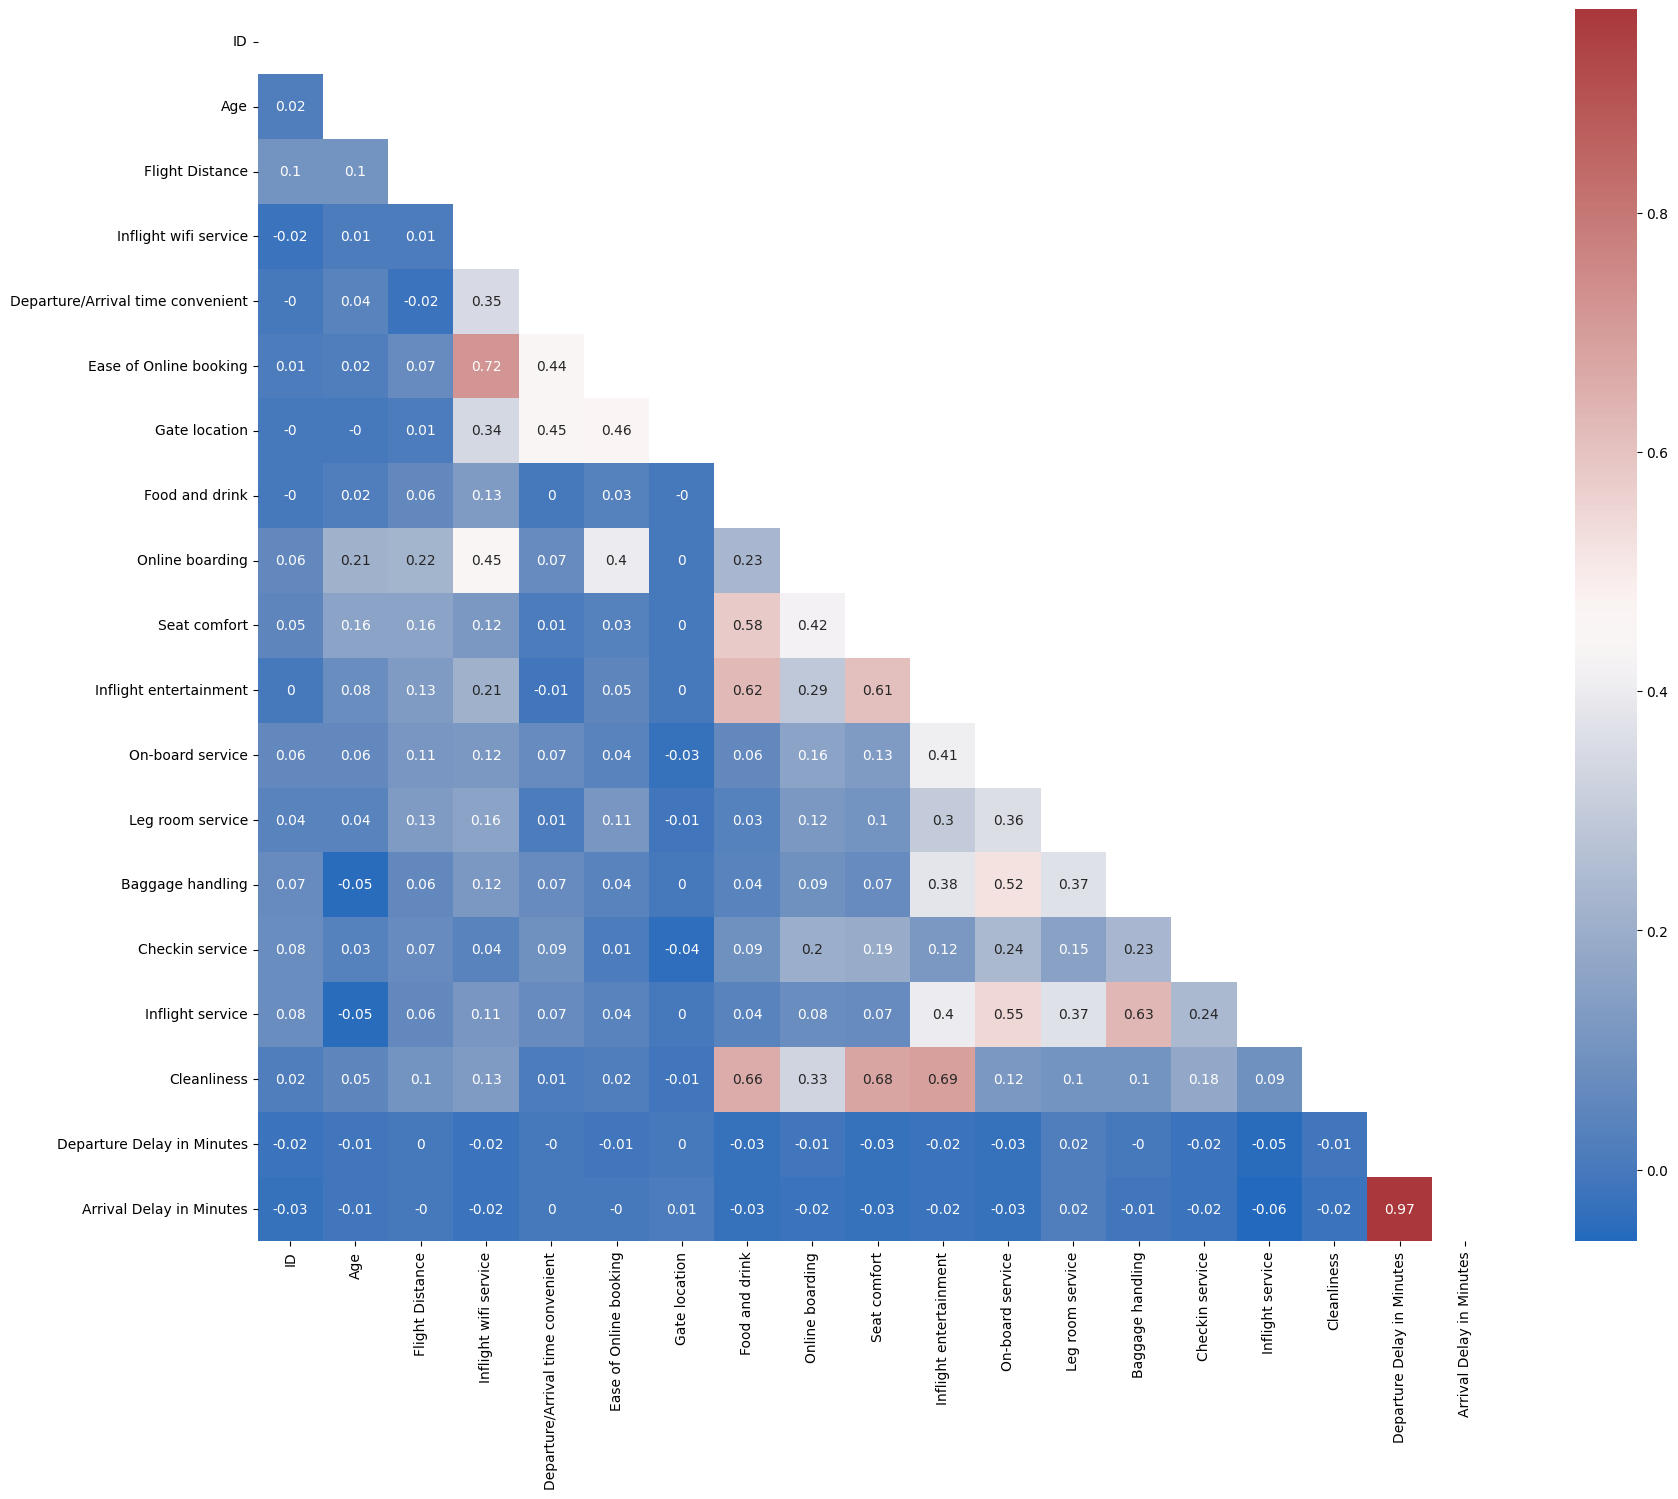

In [41]:
# TODO: just a placeholder for your data analysis
corr = dataSet.corr(method='spearman', numeric_only=True)
triangle = np.triu(corr)
plt.figure(figsize=(20,16))
sns.heatmap(dataSet.corr().round(2),annot=True,cmap="vlag",mask=triangle)

## Pie chart on the satisfaction  distribution

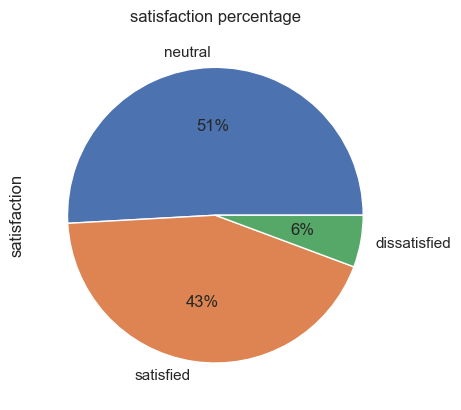

<Figure size 640x480 with 0 Axes>

In [45]:
dataSet['satisfaction'].value_counts().plot(kind="pie",autopct='%1.0f%%',title='satisfaction percentage');
plt.figure();

## Type of Travel and Class- Bar chart

Text(0.5, 1.0, 'Types of Travel and Class')

<Figure size 640x480 with 0 Axes>

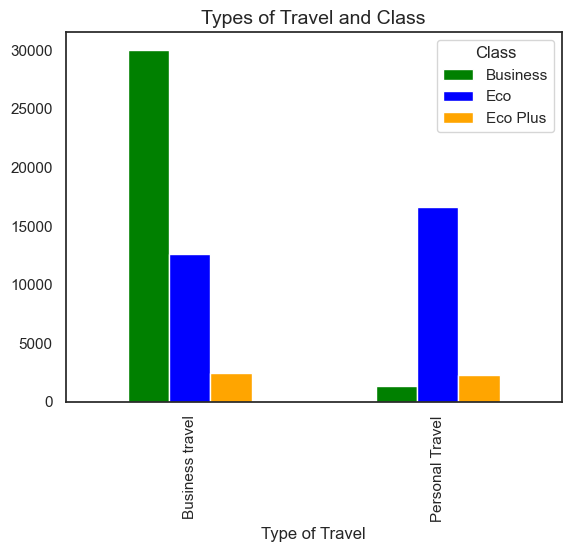

In [62]:
plt.figure();
TC = dataSet.groupby(['Type of Travel','Class'])

ax = TC.size().unstack().plot(kind='bar', color = ['green', 'blue','orange'])

ax.set_title('Types of Travel and Class', size =14)

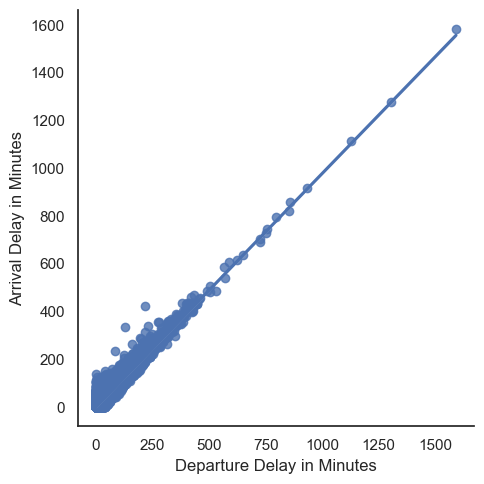

In [65]:
sns.lmplot(dataSet, x="Departure Delay in Minutes", y="Arrival Delay in Minutes")

In [ ]:
certainValues = dataSet['Departure Delay in Minutes'] == 0.0 & dataSet['Arrival Delay in Minutes'] > 0.0

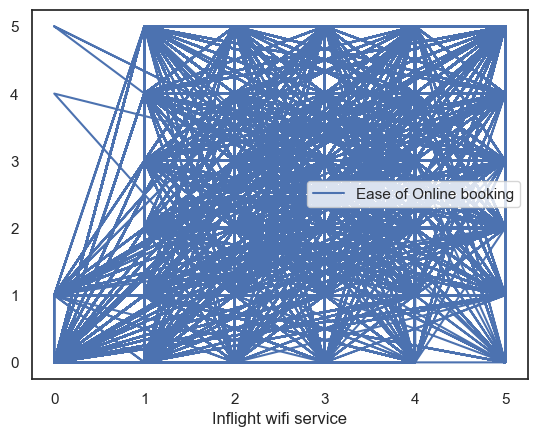

In [71]:
dataSet.plot(y='Ease of Online booking', x='Inflight wifi service');

## Box Plot on flight distance

(0.0, 5300.0)

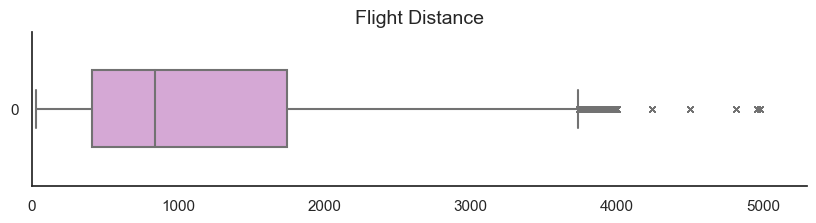

In [63]:
#set style
sns.set(style="white")
#set figure size
fig,ax = plt.subplots(figsize=(10,2))
#Title of the boxplot
plt.title('Flight Distance', fontsize=14)
#creating the boxplot
sns.boxplot(dataSet['Flight Distance'], color="plum", width=.5, orient='h', flierprops={"marker": "x"})
sns.despine()
#Add full range
plt.xlim([0,5300])

In [72]:
upper_limit = dataSet['Flight Distance'].mean() + 3*dataSet['Flight Distance'].std()
lower_limit = dataSet['Flight Distance'].mean() - 3*dataSet['Flight Distance'].std()
print('upper limit:', upper_limit)
print('lower limit:', lower_limit)
print(dataSet['Flight Distance'].value_counts() > 0)

upper limit: 4182.673824034497
lower limit: -1802.041039926089
337     True
594     True
404     True
862     True
2475    True
        ... 
1484    True
778     True
1434    True
1361    True
884     True
Name: Flight Distance, Length: 3821, dtype: bool


In [73]:
dataSet.loc[(dataSet['Flight Distance'] > upper_limit) | (dataSet['Flight Distance'] < lower_limit)]

,ID,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
994,59271,Female,Loyal Customer,26,Business travel,NaN,4243,2.0,2,2,2,4,4.0,4,3.0,5,4,4,4,5,4,26.0,0.0,satisfied
2401,59270,Female,Loyal Customer,25,Personal Travel,Eco,4963,2.0,5,2,4,2,NaN,2,5.0,3,4,4,2,3,2,0.0,NaN,neutral
2847,31870,Female,Loyal Customer,63,Personal Travel,Business,4983,0.0,5,0,2,0,NaN,1,3.0,2,4,3,1,5,1,3.0,0.0,satisfied
5903,58704,Female,Loyal Customer,25,Business travel,Business,4243,4.0,5,3,5,3,NaN,4,NaN,2,3,4,4,4,4,4.0,0.0,neutral
11306,58698,Male,disloyal Customer,22,Business travel,Business,4243,5.0,0,5,5,5,5.0,5,NaN,5,3,5,5,4,5,14.0,16.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127264,56476,Male,Loyal Customer,60,Business travel,NaN,4963,2.0,5,2,2,3,3.0,3,NaN,3,4,4,3,3,3,5.0,NaN,satisfied
128352,84495,Male,disloyal Customer,40,Business travel,NaN,4502,NaN,4,4,5,4,NaN,4,4.0,4,4,4,4,5,4,0.0,NaN,neutral
128356,84501,Female,Loyal Customer,37,Business travel,NaN,4502,2.0,2,2,2,4,NaN,4,4.0,5,5,4,4,3,4,NaN,0.0,satisfied
128844,84497,Female,Loyal Customer,39,Business travel,Eco,4502,NaN,2,2,2,1,1.0,1,2.0,4,4,4,1,4,1,16.0,0.0,neutral


## Data pre-processing
Do further data pre-processing here (in addition to dealing with the missing values)

In [ ]:
# e.g., transform feature values
"""
To handle the missing values in DDIM and ADIM, We are going to replace all the missing values with 0.
To handle the missing data in the class feature, we are going to assume that everybody that is traveling for business
is also in the business class, I want to do a comparison between them if possible

Write an if statement that, replaces N/A with 0.0 when the arrival delay is also 0.0
"""


## Running Machine Learning classifier

Add code for running machine learning experiments below, e.g., the following.

### Preparing the X and y arrays in preparation for running machine learning classifiers

In [ ]:
from sklearn import preprocessing

# Splits the Pandas DataFrame into a feature matrix (X) and class/label vector (y)
X = df.iloc[:,:len(df.columns)-1]
y = df.iloc[:,len(df.columns)-1]

### etc..

Expand and develop this notebook as you wish! :)